In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, confusion_matrix, classification_report, accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import TruncatedSVD

from pandas.api.types import is_string_dtype
from pandas.api.types import is_categorical_dtype

In [2]:
def pre_processing(credit):
	# preprocessing - convert data type and dummy coding
	cols = credit.columns
	isCat_Index = list()
	for col in cols:
		if is_string_dtype(credit[col]):
			credit[col] = credit[col].astype('category')
		isCat_Index.append(is_categorical_dtype(credit[col]))
	
	credit_d = pd.get_dummies(credit, columns=list(cols[isCat_Index]))
	print(credit_d.shape)
	return credit_d

In [3]:
SEED = 77

# preprocessing: scaling the data and split dataset
data = pd.read_csv("../credit.csv")
data = pre_processing(data)
predictors = data[data.columns.difference(["default"])]
scaler = MinMaxScaler()
predictors_scaled = scaler.fit_transform(predictors)
target = data[["default"]].values.ravel()

train_X, test_X, train_y, test_y = train_test_split(predictors_scaled, target, train_size=0.8, random_state=SEED, stratify=target)

(1000, 62)


In [4]:
svd = TruncatedSVD(n_components=25, random_state=SEED)
svd.fit(train_X)
data = svd.transform(train_X)
label = train_y

In [5]:
# Choosing the optimal k with two metrics - one is inertia, another is Silhouette Coefficient
k_grid = np.arange(1, 62)
loss1 = np.zeros(k_grid.size)
loss2 = np.zeros(k_grid.size)
for idx, k in enumerate(k_grid):
    print ("k = ", k)
    GMM = GaussianMixture(n_components=k, random_state=SEED)
    pred = GMM.fit_predict(data)
    loss1[idx] = GMM.bic(data)
    if k > 1:
        loss2[idx] = silhouette_score(data, pred)

k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10
k =  11
k =  12
k =  13
k =  14
k =  15
k =  16
k =  17
k =  18
k =  19
k =  20
k =  21
k =  22
k =  23
k =  24
k =  25
k =  26
k =  27
k =  28
k =  29
k =  30
k =  31
k =  32
k =  33
k =  34
k =  35
k =  36
k =  37
k =  38
k =  39
k =  40
k =  41
k =  42
k =  43
k =  44
k =  45
k =  46
k =  47
k =  48
k =  49
k =  50
k =  51
k =  52
k =  53
k =  54
k =  55
k =  56
k =  57
k =  58
k =  59
k =  60
k =  61


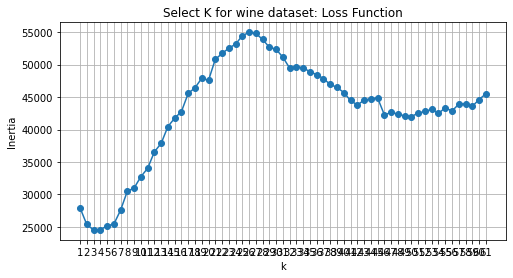

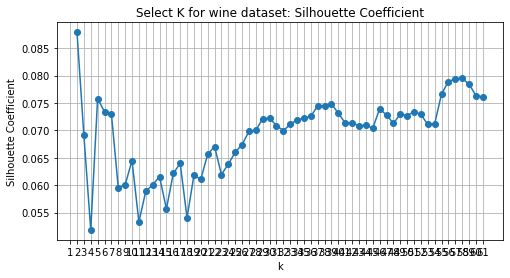

In [6]:
import matplotlib.pyplot as plt
# Plot loss vs k to find best k
plt.figure(figsize=(8,4))
plt.plot(k_grid, loss1,'-o')
plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Select K for wine dataset: Loss Function')
plt.grid()
# plt.savefig('../plots/kmeans_wine_loss_1.png', dpi=300)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(k_grid[1:], loss2[1:], marker='o')
plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
plt.title('Select K for wine dataset: Silhouette Coefficient')
plt.grid()
# plt.savefig('../plots/kmeans_wine_loss_2.png', dpi=300)
plt.show()

In [7]:
gmm = GaussianMixture(n_components=2, random_state=SEED)
pred = gmm.fit_predict(data)

print(silhouette_score(data, pred))
print(completeness_score(label, pred), homogeneity_score(label, pred))
print(accuracy_score(label, pred))

0.08789659607766354
0.0005893315999947199 0.0006440834622347789
0.4225
